In [4]:
pip install pingouin

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer
import pingouin as pg


Approach 2 for data cleaning

In [6]:
df = pd.read_excel('Questionnaire for Dissertation (Responses).xlsx')

In [7]:
df.head()

,Timestamp,Do you consent to your data being used anonymously for the purpose of improving banking services and research?,What is your age group?,What is your Gender?,What is your monthly income range?,What is your current occupation?,Which bank do you primarily use for your banking needs?,What types of bank accounts do you currently hold? (Select all that apply),How often do you visit your bank's physical branch?,How often do you use online banking services?,What is your average monthly expenditure?,What are your major categories of monthly expenditure? (Select all that apply),What methods do you commonly use for transactions? (Select all that apply),Do you currently have any loans? (Select all that apply),Do you invest in any of the following? (Select all that apply),Which types of insurance products do you have? (Select all that apply),How satisfied are you with your bank’s customer service?,Are you satisfied with the following banking services?,Is there still a thing that you feel bank should improve?
0,2024-07-15 11:22:00.069,Yes,56 and above,Female,"PKR 91,000- PKR 150,000",Employed,Public,Fixed Deposit Account,Rarely,Weekly,"PKR 90,001 - PKR 150,000","Groceries, Utilities","Credit Card, Mobile Payment Apps (e.g., Apple ...",NaN,NaN,"Health Insurance, Car Insurance",Satisfied,"Online Banking, ATM Services, Customer Support",No
1,2024-07-15 11:26:29.509,Yes,56 and above,Male,"More than PKR 300,000",Employed,Public,"Savings Account, Checking Account, Fixed Depos...",Quarterly,Weekly,"PKR 150,001 - PKR 300,000","Groceries, Utilities, Education, Travel, Healt...","Credit Card, Online Banking Transfers, Cash",Home Loan,"Mutual Funds, Real Estate","Health Insurance, Car Insurance, Home Insuranc...",Very Satisfied,"Online Banking, Mobile Banking, Loan Services,...",Improve your ATM services
2,2024-07-15 11:28:57.397,Yes,26-35,Male,"PKR 51,000 - PKR 90,000",Employed,Private,Fixed Deposit Account,Rarely,Weekly,"PKR 50,001 - PKR 90,000","Groceries, Rent/Mortgage, Utilities, Entertain...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Loan Services, Customer Support",Improve your Customer Support Services
3,2024-07-15 11:32:32.314,Yes,18-25,Male,"Less than PKR 50,000",Student,Public,Savings Account,Rarely,Daily,"Less than PKR 50,000","Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Mobile Banking",Improve your atm services
4,2024-07-15 11:34:17.348,Yes,18-25,Male,"Less than PKR 50,000",Student,Public,Fixed Deposit Account,Rarely,Weekly,"Less than PKR 50,000","Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance, Travel Insurance",Neutral,"Online Banking, Mobile Banking",Improve your online banking app structure


In [8]:
# Rename columns
df.columns = ['Timestamp', 'Consent', 'age_group', 'Gender', 'monthly_income_range', 'occupation', 'Bank', 'Type_of_Account',
              'Branch_Visit', 'Online_Banking_Usage', 'average_monthly_expenditure', 'categories_of_monthly_expenditure',
              'Mode_of_transactions', 'Loans', 'Investments', 'Type_of_Insurance', 'customer_service_Satisfaction',
              'Services_Satisfaction', 'Suggestions']

In [9]:
df.drop(['Timestamp', 'Consent'], axis='columns', inplace=True)
df.head()

,age_group,Gender,monthly_income_range,occupation,Bank,Type_of_Account,Branch_Visit,Online_Banking_Usage,average_monthly_expenditure,categories_of_monthly_expenditure,Mode_of_transactions,Loans,Investments,Type_of_Insurance,customer_service_Satisfaction,Services_Satisfaction,Suggestions
0,56 and above,Female,"PKR 91,000- PKR 150,000",Employed,Public,Fixed Deposit Account,Rarely,Weekly,"PKR 90,001 - PKR 150,000","Groceries, Utilities","Credit Card, Mobile Payment Apps (e.g., Apple ...",NaN,NaN,"Health Insurance, Car Insurance",Satisfied,"Online Banking, ATM Services, Customer Support",No
1,56 and above,Male,"More than PKR 300,000",Employed,Public,"Savings Account, Checking Account, Fixed Depos...",Quarterly,Weekly,"PKR 150,001 - PKR 300,000","Groceries, Utilities, Education, Travel, Healt...","Credit Card, Online Banking Transfers, Cash",Home Loan,"Mutual Funds, Real Estate","Health Insurance, Car Insurance, Home Insuranc...",Very Satisfied,"Online Banking, Mobile Banking, Loan Services,...",Improve your ATM services
2,26-35,Male,"PKR 51,000 - PKR 90,000",Employed,Private,Fixed Deposit Account,Rarely,Weekly,"PKR 50,001 - PKR 90,000","Groceries, Rent/Mortgage, Utilities, Entertain...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Loan Services, Customer Support",Improve your Customer Support Services
3,18-25,Male,"Less than PKR 50,000",Student,Public,Savings Account,Rarely,Daily,"Less than PKR 50,000","Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Mobile Banking",Improve your atm services
4,18-25,Male,"Less than PKR 50,000",Student,Public,Fixed Deposit Account,Rarely,Weekly,"Less than PKR 50,000","Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance, Travel Insurance",Neutral,"Online Banking, Mobile Banking",Improve your online banking app structure


In [10]:
# Encoding categorical variables
df['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
df['Bank'].replace({'Public': 1, 'Private': 0}, inplace=True)
df.head()

,age_group,Gender,monthly_income_range,occupation,Bank,Type_of_Account,Branch_Visit,Online_Banking_Usage,average_monthly_expenditure,categories_of_monthly_expenditure,Mode_of_transactions,Loans,Investments,Type_of_Insurance,customer_service_Satisfaction,Services_Satisfaction,Suggestions
0,56 and above,1,"PKR 91,000- PKR 150,000",Employed,1,Fixed Deposit Account,Rarely,Weekly,"PKR 90,001 - PKR 150,000","Groceries, Utilities","Credit Card, Mobile Payment Apps (e.g., Apple ...",NaN,NaN,"Health Insurance, Car Insurance",Satisfied,"Online Banking, ATM Services, Customer Support",No
1,56 and above,0,"More than PKR 300,000",Employed,1,"Savings Account, Checking Account, Fixed Depos...",Quarterly,Weekly,"PKR 150,001 - PKR 300,000","Groceries, Utilities, Education, Travel, Healt...","Credit Card, Online Banking Transfers, Cash",Home Loan,"Mutual Funds, Real Estate","Health Insurance, Car Insurance, Home Insuranc...",Very Satisfied,"Online Banking, Mobile Banking, Loan Services,...",Improve your ATM services
2,26-35,0,"PKR 51,000 - PKR 90,000",Employed,0,Fixed Deposit Account,Rarely,Weekly,"PKR 50,001 - PKR 90,000","Groceries, Rent/Mortgage, Utilities, Entertain...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Loan Services, Customer Support",Improve your Customer Support Services
3,18-25,0,"Less than PKR 50,000",Student,1,Savings Account,Rarely,Daily,"Less than PKR 50,000","Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Mobile Banking",Improve your atm services
4,18-25,0,"Less than PKR 50,000",Student,1,Fixed Deposit Account,Rarely,Weekly,"Less than PKR 50,000","Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance, Travel Insurance",Neutral,"Online Banking, Mobile Banking",Improve your online banking app structure


In [11]:
df.dtypes

,0
age_group,object
Gender,int64
monthly_income_range,object
occupation,object
Bank,int64
Type_of_Account,object
Branch_Visit,object
Online_Banking_Usage,object
average_monthly_expenditure,object
categories_of_monthly_expenditure,object


In [12]:
'''def age_group_to_average(age_group):
    if 'and above' in age_group:
        return 56.0
    else:
        age_range = age_group.split('-')
        avg_age = (int(age_range[0]) + int(age_range[1])) / 2
        return avg_age

df['age_group'] = df['age_group'].apply(age_group_to_average)'''


"def age_group_to_average(age_group):\n    if 'and above' in age_group:\n        return 56.0\n    else:\n        age_range = age_group.split('-')\n        avg_age = (int(age_range[0]) + int(age_range[1])) / 2\n        return avg_age\n\ndf['age_group'] = df['age_group'].apply(age_group_to_average)"

In [13]:
ordered_age_groups = ['18-25', '26-35', '36-45', '46-55', '56 and above']

age_group_mapping = {age_group: i for i, age_group in enumerate(ordered_age_groups)}

df['age_group'] = df['age_group'].map(age_group_mapping)

In [14]:
print(df['age_group'].unique())

[4 1 0 3 2]


In [15]:
df.head()

,age_group,Gender,monthly_income_range,occupation,Bank,Type_of_Account,Branch_Visit,Online_Banking_Usage,average_monthly_expenditure,categories_of_monthly_expenditure,Mode_of_transactions,Loans,Investments,Type_of_Insurance,customer_service_Satisfaction,Services_Satisfaction,Suggestions
0,4,1,"PKR 91,000- PKR 150,000",Employed,1,Fixed Deposit Account,Rarely,Weekly,"PKR 90,001 - PKR 150,000","Groceries, Utilities","Credit Card, Mobile Payment Apps (e.g., Apple ...",NaN,NaN,"Health Insurance, Car Insurance",Satisfied,"Online Banking, ATM Services, Customer Support",No
1,4,0,"More than PKR 300,000",Employed,1,"Savings Account, Checking Account, Fixed Depos...",Quarterly,Weekly,"PKR 150,001 - PKR 300,000","Groceries, Utilities, Education, Travel, Healt...","Credit Card, Online Banking Transfers, Cash",Home Loan,"Mutual Funds, Real Estate","Health Insurance, Car Insurance, Home Insuranc...",Very Satisfied,"Online Banking, Mobile Banking, Loan Services,...",Improve your ATM services
2,1,0,"PKR 51,000 - PKR 90,000",Employed,0,Fixed Deposit Account,Rarely,Weekly,"PKR 50,001 - PKR 90,000","Groceries, Rent/Mortgage, Utilities, Entertain...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Loan Services, Customer Support",Improve your Customer Support Services
3,0,0,"Less than PKR 50,000",Student,1,Savings Account,Rarely,Daily,"Less than PKR 50,000","Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Mobile Banking",Improve your atm services
4,0,0,"Less than PKR 50,000",Student,1,Fixed Deposit Account,Rarely,Weekly,"Less than PKR 50,000","Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance, Travel Insurance",Neutral,"Online Banking, Mobile Banking",Improve your online banking app structure


In [16]:
def income_range_to_average(income_range):
    if 'Less than' in income_range:
        return 50000.0
    elif 'More than' in income_range:
        return 300000.0
    else:
        income_range = income_range.replace('PKR ', '').replace(',', '')
        income_bounds = income_range.split('-')
        avg_income = (int(income_bounds[0]) + int(income_bounds[1])) / 2
        return avg_income

df['monthly_income_range'] = df['monthly_income_range'].apply(income_range_to_average)

In [17]:
df.iloc[109]

,109
age_group,4
Gender,1
monthly_income_range,300000.0
occupation,Self-employed
Bank,0
Type_of_Account,"Savings Account, Business Account"
Branch_Visit,Monthly
Online_Banking_Usage,Daily
average_monthly_expenditure,"PKR 150,001 - PKR 300,000"
categories_of_monthly_expenditure,"Groceries, Utilities, Travel, Entertainment, H..."


In [18]:
def expenditure_range_to_average(expenditure_range):
    if 'Less than' in expenditure_range:
        return 50000.0
    elif 'More than' in expenditure_range:
        return 300000.0
    elif '3-5k' in expenditure_range:
        return 50000.0
    else:
        expenditure_range = expenditure_range.replace('PKR ', '').replace(',', '')
        expenditure_bounds = expenditure_range.split('-')
        avg_expenditure = (int(expenditure_bounds[0]) + int(expenditure_bounds[1])) / 2
        return avg_expenditure

df['average_monthly_expenditure'] = df['average_monthly_expenditure'].apply(expenditure_range_to_average)


In [19]:
df.head()

,age_group,Gender,monthly_income_range,occupation,Bank,Type_of_Account,Branch_Visit,Online_Banking_Usage,average_monthly_expenditure,categories_of_monthly_expenditure,Mode_of_transactions,Loans,Investments,Type_of_Insurance,customer_service_Satisfaction,Services_Satisfaction,Suggestions
0,4,1,120500.0,Employed,1,Fixed Deposit Account,Rarely,Weekly,120000.5,"Groceries, Utilities","Credit Card, Mobile Payment Apps (e.g., Apple ...",NaN,NaN,"Health Insurance, Car Insurance",Satisfied,"Online Banking, ATM Services, Customer Support",No
1,4,0,300000.0,Employed,1,"Savings Account, Checking Account, Fixed Depos...",Quarterly,Weekly,225000.5,"Groceries, Utilities, Education, Travel, Healt...","Credit Card, Online Banking Transfers, Cash",Home Loan,"Mutual Funds, Real Estate","Health Insurance, Car Insurance, Home Insuranc...",Very Satisfied,"Online Banking, Mobile Banking, Loan Services,...",Improve your ATM services
2,1,0,70500.0,Employed,0,Fixed Deposit Account,Rarely,Weekly,70000.5,"Groceries, Rent/Mortgage, Utilities, Entertain...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Loan Services, Customer Support",Improve your Customer Support Services
3,0,0,50000.0,Student,1,Savings Account,Rarely,Daily,50000.0,"Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance",Neutral,"Online Banking, Mobile Banking",Improve your atm services
4,0,0,50000.0,Student,1,Fixed Deposit Account,Rarely,Weekly,50000.0,"Groceries, Rent/Mortgage, Utilities, Travel, E...","Mobile Payment Apps (e.g., Apple Pay, Google W...",Student Loan,NaN,"Health Insurance, Car Insurance, Travel Insurance",Neutral,"Online Banking, Mobile Banking",Improve your online banking app structure


In [20]:
null_columns = ['Loans', 'Investments', 'Type_of_Insurance', 'Suggestions']
for column in null_columns:
    if column in df.columns:
        df[column] = df[column].fillna('no')

In [21]:
df.iloc[109]

,109
age_group,4
Gender,1
monthly_income_range,300000.0
occupation,Self-employed
Bank,0
Type_of_Account,"Savings Account, Business Account"
Branch_Visit,Monthly
Online_Banking_Usage,Daily
average_monthly_expenditure,225000.5
categories_of_monthly_expenditure,"Groceries, Utilities, Travel, Entertainment, H..."


In [22]:
df['Suggestions'].unique().shape

(87,)

In [23]:
def clean_text(s):
    if isinstance(s, str):
        return s.strip().lower()
    return s
df = df.map(clean_text)

In [24]:
no_suggestions_variations = ['noo', 'n/a', 'na', 'not really', 'none', 'nothing', 'nan', 'no', 'na', 'nope', 'no thankyou', 'i am very satisfied with my bank services', 'i am satisfied with overall services', 'no i am satisfied with everything']
df['Suggestions'] = df['Suggestions'].replace(no_suggestions_variations, 'none')


In [25]:
df

,age_group,Gender,monthly_income_range,occupation,Bank,Type_of_Account,Branch_Visit,Online_Banking_Usage,average_monthly_expenditure,categories_of_monthly_expenditure,Mode_of_transactions,Loans,Investments,Type_of_Insurance,customer_service_Satisfaction,Services_Satisfaction,Suggestions
0,4,1,120500.0,employed,1,fixed deposit account,rarely,weekly,120000.5,"groceries, utilities","credit card, mobile payment apps (e.g., apple ...",no,no,"health insurance, car insurance",satisfied,"online banking, atm services, customer support",none
1,4,0,300000.0,employed,1,"savings account, checking account, fixed depos...",quarterly,weekly,225000.5,"groceries, utilities, education, travel, healt...","credit card, online banking transfers, cash",home loan,"mutual funds, real estate","health insurance, car insurance, home insuranc...",very satisfied,"online banking, mobile banking, loan services,...",improve your atm services
2,1,0,70500.0,employed,0,fixed deposit account,rarely,weekly,70000.5,"groceries, rent/mortgage, utilities, entertain...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance",neutral,"online banking, loan services, customer support",improve your customer support services
3,0,0,50000.0,student,1,savings account,rarely,daily,50000.0,"groceries, rent/mortgage, utilities, travel, e...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance",neutral,"online banking, mobile banking",improve your atm services
4,0,0,50000.0,student,1,fixed deposit account,rarely,weekly,50000.0,"groceries, rent/mortgage, utilities, travel, e...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance, travel insurance",neutral,"online banking, mobile banking",improve your online banking app structure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,4,1,50000.0,unemployed,0,savings account,never,monthly,50000.0,"groceries, utilities",debit card,no,no,no,satisfied,atm services,none
147,3,1,50000.0,self-employed,1,"savings account, checking account",quarterly,weekly,70000.5,"groceries, utilities, entertainment","credit card, online banking transfers, cash",no,no,no,satisfied,"online banking, atm services",none
148,4,0,300000.0,self-employed,1,"savings account, checking account, fixed depos...",monthly,monthly,225000.5,"groceries, utilities, education, travel, enter...","credit card, mobile payment apps (e.g., apple ...",business loan,"bonds, real estate",no,satisfied,"mobile banking, atm services, investment services",there investment services team
149,2,0,120500.0,employed,0,"checking account, fixed deposit account",rarely,daily,70000.5,"groceries, utilities, entertainment, health an...","credit card, online banking transfers, cash","personal loan, car loan",no,"health insurance, car insurance",very satisfied,"online banking, atm services, customer support",none


In [26]:
df['Suggestions'].unique().shape

(71,)

In [27]:
df['Suggestions'].unique()

array(['none', 'improve your atm services',
       'improve your customer support services',
       'improve your online banking app structure',
       'please make your customer support staff aware about the things',
       'please have your atm services near the areas where i live',
       'please improve your advertisement strategies',
       'please reduce the payment transferring time',
       'please improve your online services as your app goes into technical error very often',
       'increase the points for every transaction made through credit cards',
       'improve your call center staff',
       'please have your atm services in every area because i have withdraw cash from other bank which charges some money',
       'please dont block my crypto currency transaction',
       'make me aware of new offers through emails',
       'reduce the interest rates for students',
       'please dont block my account when i am not using it for more than 6 months',
       'improve your 

In [28]:
categories = {
    'Online Banking': ['online banking', 'application', 'mobile app', 'internet banking'],
    'ATM Services': ['atm', 'ATM'],
    'Customer Support': ['customer support', 'customer service', 'helpdesk', 'help', 'call center', 'service'],
    'Security': ['security', 'secure', 'safety', 'scam'],
    'Marketing': ['advertisement', 'marketing', 'promotion', 'offers'],
    'no': ['none'],
    'Others': []
}

# Function to classify suggestions
def categorize_suggestion(suggestion):
    suggestion_lower = suggestion.lower()
    #if suggestion_lower != 'none':
    for category, keywords in categories.items():
        if any(keyword in suggestion_lower for keyword in keywords):
            return category

    return 'Others'

# Apply the classification function
df['Suggestions'] = df['Suggestions'].apply(categorize_suggestion)

In [29]:
df['Suggestions'].unique()

array(['no', 'ATM Services', 'Customer Support', 'Online Banking',
       'Marketing', 'Others', 'Security'], dtype=object)

In [30]:
df

,age_group,Gender,monthly_income_range,occupation,Bank,Type_of_Account,Branch_Visit,Online_Banking_Usage,average_monthly_expenditure,categories_of_monthly_expenditure,Mode_of_transactions,Loans,Investments,Type_of_Insurance,customer_service_Satisfaction,Services_Satisfaction,Suggestions
0,4,1,120500.0,employed,1,fixed deposit account,rarely,weekly,120000.5,"groceries, utilities","credit card, mobile payment apps (e.g., apple ...",no,no,"health insurance, car insurance",satisfied,"online banking, atm services, customer support",no
1,4,0,300000.0,employed,1,"savings account, checking account, fixed depos...",quarterly,weekly,225000.5,"groceries, utilities, education, travel, healt...","credit card, online banking transfers, cash",home loan,"mutual funds, real estate","health insurance, car insurance, home insuranc...",very satisfied,"online banking, mobile banking, loan services,...",ATM Services
2,1,0,70500.0,employed,0,fixed deposit account,rarely,weekly,70000.5,"groceries, rent/mortgage, utilities, entertain...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance",neutral,"online banking, loan services, customer support",Customer Support
3,0,0,50000.0,student,1,savings account,rarely,daily,50000.0,"groceries, rent/mortgage, utilities, travel, e...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance",neutral,"online banking, mobile banking",ATM Services
4,0,0,50000.0,student,1,fixed deposit account,rarely,weekly,50000.0,"groceries, rent/mortgage, utilities, travel, e...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance, travel insurance",neutral,"online banking, mobile banking",Online Banking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,4,1,50000.0,unemployed,0,savings account,never,monthly,50000.0,"groceries, utilities",debit card,no,no,no,satisfied,atm services,no
147,3,1,50000.0,self-employed,1,"savings account, checking account",quarterly,weekly,70000.5,"groceries, utilities, entertainment","credit card, online banking transfers, cash",no,no,no,satisfied,"online banking, atm services",no
148,4,0,300000.0,self-employed,1,"savings account, checking account, fixed depos...",monthly,monthly,225000.5,"groceries, utilities, education, travel, enter...","credit card, mobile payment apps (e.g., apple ...",business loan,"bonds, real estate",no,satisfied,"mobile banking, atm services, investment services",Customer Support
149,2,0,120500.0,employed,0,"checking account, fixed deposit account",rarely,daily,70000.5,"groceries, utilities, entertainment, health an...","credit card, online banking transfers, cash","personal loan, car loan",no,"health insurance, car insurance",very satisfied,"online banking, atm services, customer support",no


In [31]:
def clean_text(s):
    if isinstance(s, str):
        return s.strip().lower()
    return s
df = df.map(clean_text)

In [32]:
df['Suggestions'].unique()

array(['no', 'atm services', 'customer support', 'online banking',
       'marketing', 'others', 'security'], dtype=object)

In [33]:
df

,age_group,Gender,monthly_income_range,occupation,Bank,Type_of_Account,Branch_Visit,Online_Banking_Usage,average_monthly_expenditure,categories_of_monthly_expenditure,Mode_of_transactions,Loans,Investments,Type_of_Insurance,customer_service_Satisfaction,Services_Satisfaction,Suggestions
0,4,1,120500.0,employed,1,fixed deposit account,rarely,weekly,120000.5,"groceries, utilities","credit card, mobile payment apps (e.g., apple ...",no,no,"health insurance, car insurance",satisfied,"online banking, atm services, customer support",no
1,4,0,300000.0,employed,1,"savings account, checking account, fixed depos...",quarterly,weekly,225000.5,"groceries, utilities, education, travel, healt...","credit card, online banking transfers, cash",home loan,"mutual funds, real estate","health insurance, car insurance, home insuranc...",very satisfied,"online banking, mobile banking, loan services,...",atm services
2,1,0,70500.0,employed,0,fixed deposit account,rarely,weekly,70000.5,"groceries, rent/mortgage, utilities, entertain...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance",neutral,"online banking, loan services, customer support",customer support
3,0,0,50000.0,student,1,savings account,rarely,daily,50000.0,"groceries, rent/mortgage, utilities, travel, e...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance",neutral,"online banking, mobile banking",atm services
4,0,0,50000.0,student,1,fixed deposit account,rarely,weekly,50000.0,"groceries, rent/mortgage, utilities, travel, e...","mobile payment apps (e.g., apple pay, google w...",student loan,no,"health insurance, car insurance, travel insurance",neutral,"online banking, mobile banking",online banking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,4,1,50000.0,unemployed,0,savings account,never,monthly,50000.0,"groceries, utilities",debit card,no,no,no,satisfied,atm services,no
147,3,1,50000.0,self-employed,1,"savings account, checking account",quarterly,weekly,70000.5,"groceries, utilities, entertainment","credit card, online banking transfers, cash",no,no,no,satisfied,"online banking, atm services",no
148,4,0,300000.0,self-employed,1,"savings account, checking account, fixed depos...",monthly,monthly,225000.5,"groceries, utilities, education, travel, enter...","credit card, mobile payment apps (e.g., apple ...",business loan,"bonds, real estate",no,satisfied,"mobile banking, atm services, investment services",customer support
149,2,0,120500.0,employed,0,"checking account, fixed deposit account",rarely,daily,70000.5,"groceries, utilities, entertainment, health an...","credit card, online banking transfers, cash","personal loan, car loan",no,"health insurance, car insurance",very satisfied,"online banking, atm services, customer support",no


In [34]:
one_hot_columns = [
    'occupation', 'Branch_Visit',
    'Online_Banking_Usage','customer_service_Satisfaction'
]

for column in one_hot_columns:
    df = pd.get_dummies(df, columns=[column], drop_first=True)

In [35]:
df = pd.get_dummies(df, columns=['Suggestions'], drop_first=False)

In [36]:
df.head()

,age_group,Gender,monthly_income_range,Bank,Type_of_Account,average_monthly_expenditure,categories_of_monthly_expenditure,Mode_of_transactions,Loans,Investments,...,customer_service_Satisfaction_neutral,customer_service_Satisfaction_satisfied,customer_service_Satisfaction_very satisfied,Suggestions_atm services,Suggestions_customer support,Suggestions_marketing,Suggestions_no,Suggestions_online banking,Suggestions_others,Suggestions_security
0,4,1,120500.0,1,fixed deposit account,120000.5,"groceries, utilities","credit card, mobile payment apps (e.g., apple ...",no,no,...,False,True,False,False,False,False,True,False,False,False
1,4,0,300000.0,1,"savings account, checking account, fixed depos...",225000.5,"groceries, utilities, education, travel, healt...","credit card, online banking transfers, cash",home loan,"mutual funds, real estate",...,False,False,True,True,False,False,False,False,False,False
2,1,0,70500.0,0,fixed deposit account,70000.5,"groceries, rent/mortgage, utilities, entertain...","mobile payment apps (e.g., apple pay, google w...",student loan,no,...,True,False,False,False,True,False,False,False,False,False
3,0,0,50000.0,1,savings account,50000.0,"groceries, rent/mortgage, utilities, travel, e...","mobile payment apps (e.g., apple pay, google w...",student loan,no,...,True,False,False,True,False,False,False,False,False,False
4,0,0,50000.0,1,fixed deposit account,50000.0,"groceries, rent/mortgage, utilities, travel, e...","mobile payment apps (e.g., apple pay, google w...",student loan,no,...,True,False,False,False,False,False,False,True,False,False


In [37]:
df.shape

(151, 33)

In [38]:
df.dtypes

,0
age_group,int64
Gender,int64
monthly_income_range,float64
Bank,int64
Type_of_Account,object
average_monthly_expenditure,float64
categories_of_monthly_expenditure,object
Mode_of_transactions,object
Loans,object
Investments,object


In [39]:
multi_label_columns = [
    'Type_of_Account', 'categories_of_monthly_expenditure', 'Mode_of_transactions',
    'Loans', 'Investments', 'Type_of_Insurance', 'Services_Satisfaction'
]

for column in multi_label_columns:
    df[column] = df[column].fillna('no')
    mlb = MultiLabelBinarizer()
    transformed_data = mlb.fit_transform(df.pop(column))
    mlb_df = pd.DataFrame(transformed_data, columns=[f"{column}_{cls}" for cls in mlb.classes_], index=df.index)
    df = df.join(mlb_df)

In [40]:
print(df.dtypes)
print(df.shape)

age_group                        int64
Gender                           int64
monthly_income_range           float64
Bank                             int64
average_monthly_expenditure    float64
                                ...   
Services_Satisfaction_r          int64
Services_Satisfaction_s          int64
Services_Satisfaction_t          int64
Services_Satisfaction_u          int64
Services_Satisfaction_v          int64
Length: 173, dtype: object
(151, 173)


In [41]:
df.head()

,age_group,Gender,monthly_income_range,Bank,average_monthly_expenditure,occupation_self-employed,occupation_student,occupation_unemployed,Branch_Visit_never,Branch_Visit_quarterly,...,Services_Satisfaction_l,Services_Satisfaction_m,Services_Satisfaction_n,Services_Satisfaction_o,Services_Satisfaction_p,Services_Satisfaction_r,Services_Satisfaction_s,Services_Satisfaction_t,Services_Satisfaction_u,Services_Satisfaction_v
0,4,1,120500.0,1,120000.5,False,False,False,False,False,...,1,1,1,1,1,1,1,1,1,1
1,4,0,300000.0,1,225000.5,False,False,False,False,True,...,1,1,1,1,1,1,1,1,1,1
2,1,0,70500.0,0,70000.5,False,False,False,False,False,...,1,1,1,1,1,1,1,1,1,1
3,0,0,50000.0,1,50000.0,False,True,False,False,False,...,1,1,1,1,0,0,0,0,0,0
4,0,0,50000.0,1,50000.0,False,True,False,False,False,...,1,1,1,1,0,0,0,0,0,0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [43]:
df_scaled

array([[ 1.75539904,  1.16592238,  0.06420034, ...,  0.42389562,
         1.58481163,  0.4454354 ],
       [ 1.75539904, -0.85769003,  2.31099555, ...,  0.42389562,
         1.58481163,  0.4454354 ],
       [-0.32626527, -0.85769003, -0.5616479 , ...,  0.42389562,
         1.58481163,  0.4454354 ],
       ...,
       [ 1.75539904, -0.85769003,  2.31099555, ...,  0.42389562,
        -0.63098982,  0.4454354 ],
       [ 0.36762284, -0.85769003,  0.06420034, ...,  0.42389562,
         1.58481163,  0.4454354 ],
       [-1.02015337,  1.16592238, -0.81824569, ...,  0.42389562,
         1.58481163,  0.4454354 ]])

In [44]:
df_scaled1 = pd.DataFrame(df_scaled)
df_scaled1

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,1.755399,1.165922,0.064200,1.075706,0.311430,-0.477119,-0.610514,-0.220479,-0.401918,-0.401918,...,0.487550,0.164957,0.466628,0.332106,1.584812,0.412968,0.412968,0.423896,1.584812,0.445435
1,1.755399,-0.857690,2.310996,1.075706,1.922416,-0.477119,-0.610514,-0.220479,-0.401918,2.488067,...,0.487550,0.164957,0.466628,0.332106,1.584812,0.412968,0.412968,0.423896,1.584812,0.445435
2,-0.326265,-0.857690,-0.561648,-0.929622,-0.455706,-0.477119,-0.610514,-0.220479,-0.401918,-0.401918,...,0.487550,0.164957,0.466628,0.332106,1.584812,0.412968,0.412968,0.423896,1.584812,0.445435
3,-1.020153,-0.857690,-0.818246,1.075706,-0.762569,-0.477119,1.637964,-0.220479,-0.401918,-0.401918,...,0.487550,0.164957,0.466628,0.332106,-0.630990,-2.421495,-2.421495,-2.359071,-0.630990,-2.244994
4,-1.020153,-0.857690,-0.818246,1.075706,-0.762569,-0.477119,1.637964,-0.220479,-0.401918,-0.401918,...,0.487550,0.164957,0.466628,0.332106,-0.630990,-2.421495,-2.421495,-2.359071,-0.630990,-2.244994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1.755399,1.165922,-0.818246,-0.929622,-0.762569,-0.477119,-0.610514,4.535574,2.488067,-0.401918,...,-2.051072,0.164957,-2.143034,-3.011091,-0.630990,0.412968,0.412968,0.423896,-0.630990,0.445435
147,1.061511,1.165922,-0.818246,1.075706,-0.455706,2.095914,-0.610514,-0.220479,-0.401918,2.488067,...,0.487550,0.164957,0.466628,0.332106,-0.630990,0.412968,0.412968,0.423896,-0.630990,0.445435
148,1.755399,-0.857690,2.310996,1.075706,1.922416,2.095914,-0.610514,-0.220479,-0.401918,-0.401918,...,0.487550,0.164957,0.466628,0.332106,-0.630990,0.412968,0.412968,0.423896,-0.630990,0.445435
149,0.367623,-0.857690,0.064200,-0.929622,-0.455706,-0.477119,-0.610514,-0.220479,-0.401918,-0.401918,...,0.487550,0.164957,0.466628,0.332106,1.584812,0.412968,0.412968,0.423896,1.584812,0.445435


In [45]:
alpha = pg.cronbach_alpha(data=df_scaled1)

print(f"Cronbach's Alpha: {alpha}")

Cronbach's Alpha: (0.9286706669764272, array([0.912, 0.944]))


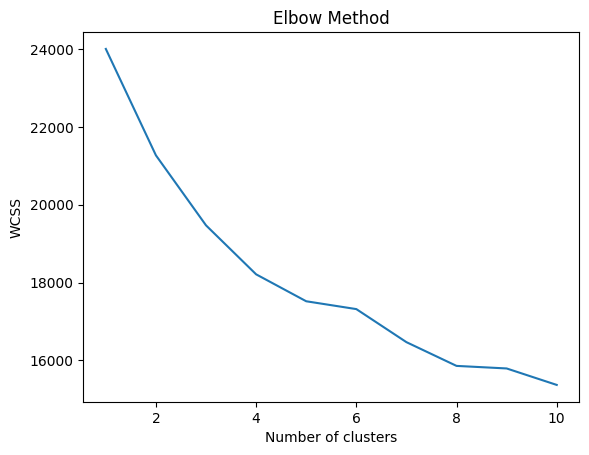

In [46]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

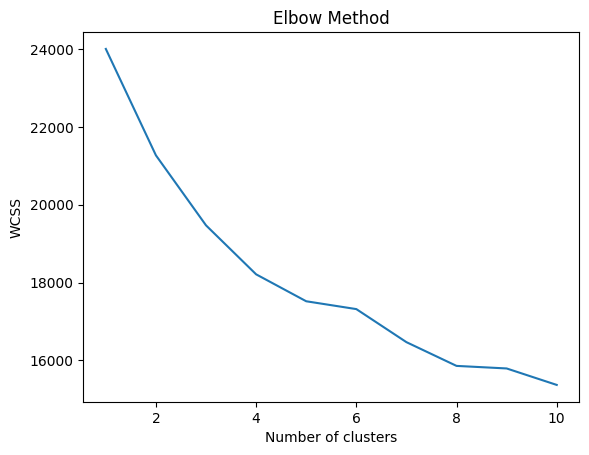

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_scaled, method='ward')

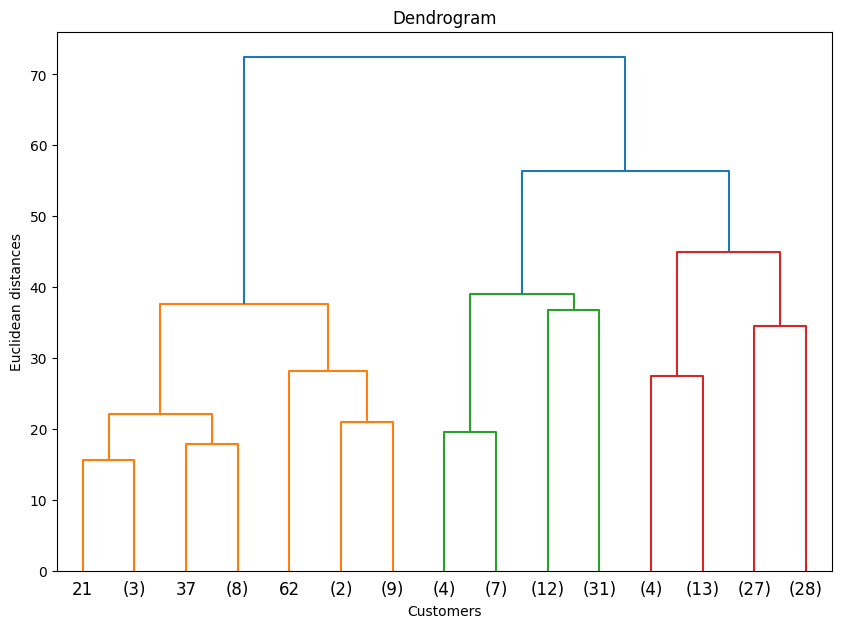

In [49]:
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=3)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

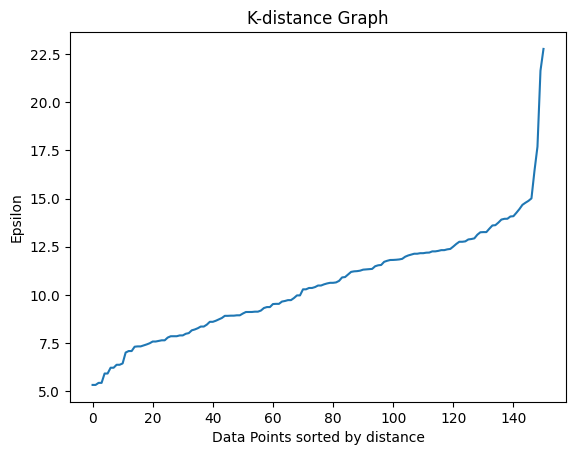

In [50]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

In [52]:
from sklearn.cluster import KMeans

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

reduced_df['Cluster_KMeans'] = clusters_kmeans


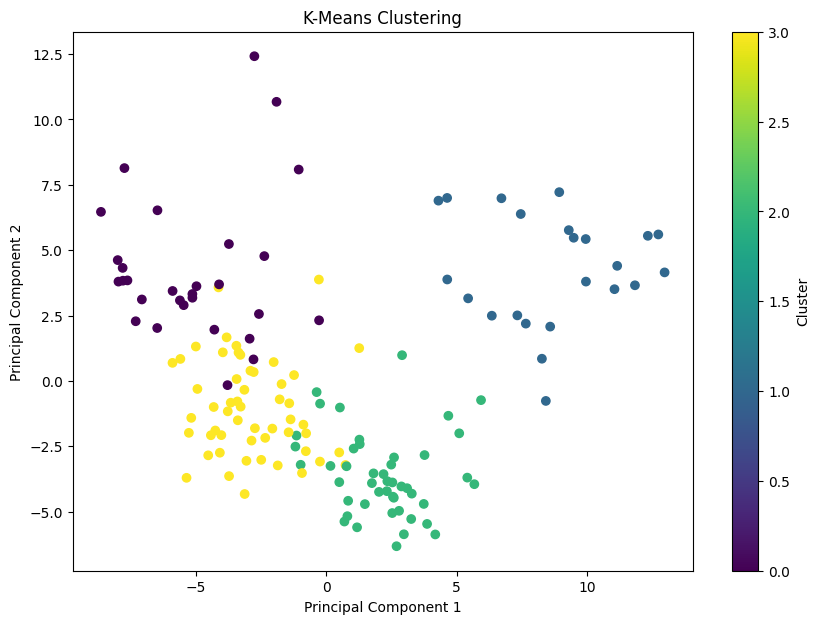

In [53]:
plt.figure(figsize=(10, 7))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster_KMeans'], cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering
optimal_clusters_hier = 4
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters_hier, affinity='euclidean', linkage='ward')
clusters_hierarchical = agglomerative.fit_predict(df_scaled)

reduced_df['Cluster_Hierarchical'] = clusters_hierarchical

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


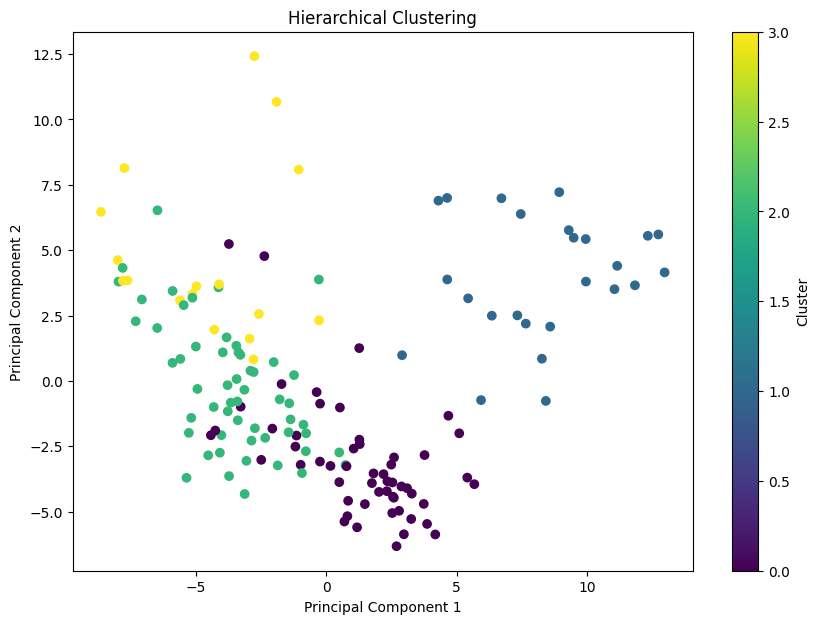

In [55]:
plt.figure(figsize=(10, 7))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster_Hierarchical'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00         5
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.98      0.98      0.98        31
weighted avg       0.97      0.97      0.97        31

LogisticRegression Confusion Matrix:
 [[12  0  1  0]
 [ 0  5  0  0]
 [ 0  0 11  0]
 [ 0  0  0  2]]
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.62      1.00      0.77         5
           2       0.92      1.00      0.96        11
           3       1.00      0.50      0.67         2

    accuracy                           0.87        31
   macro avg       0.89      0.82      0.82       

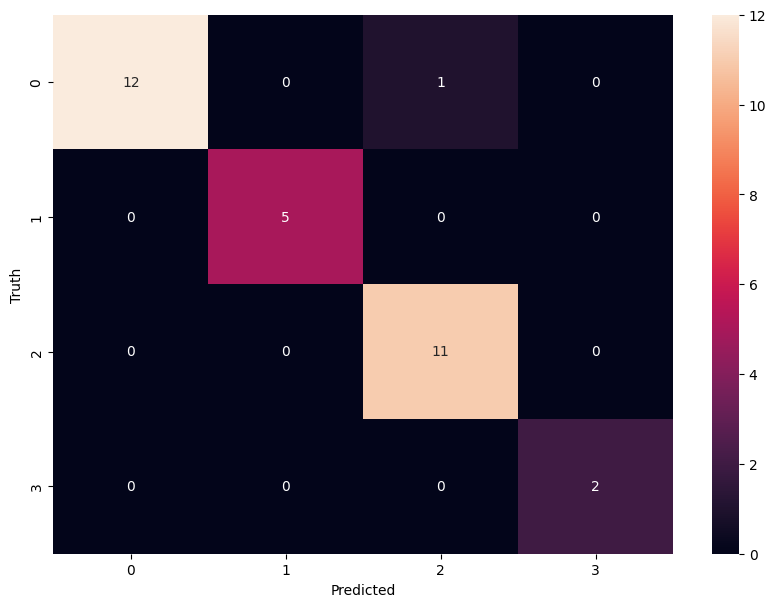

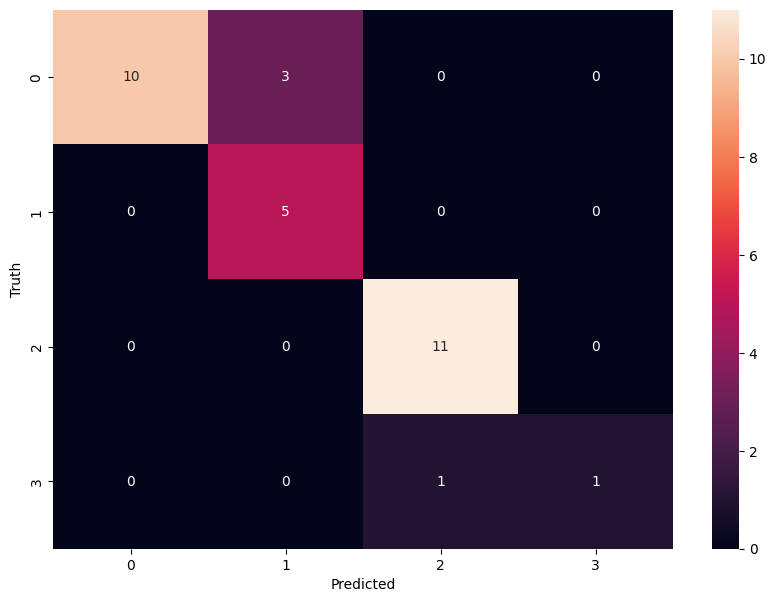

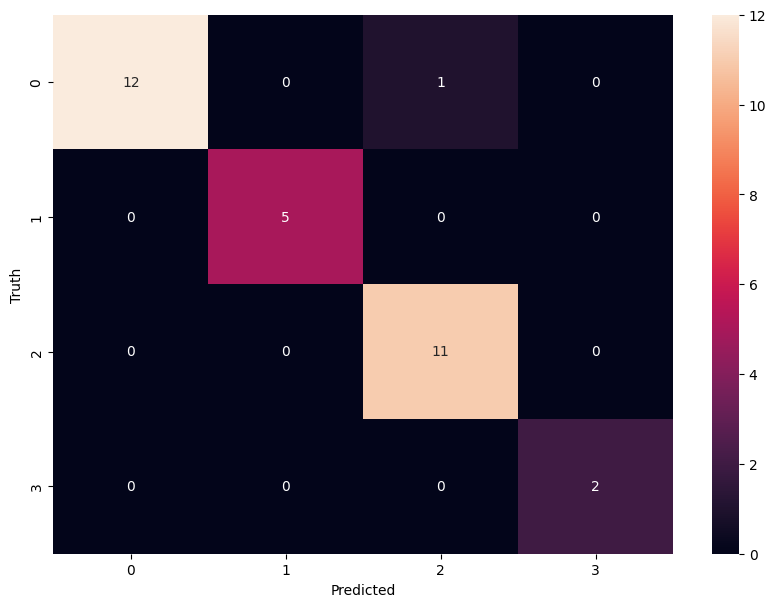

In [58]:
X_train, X_test, y_train, y_test = prepare_data_and_split(df_scaled, df, clusters_hierarchical)
evaluate_model(LogisticRegression(random_state=42, max_iter=1000), X_train, X_test, y_train, y_test)
evaluate_model(RandomForestClassifier(random_state=42, n_estimators=100), X_train, X_test, y_train, y_test)
evaluate_model(SVC(random_state=42), X_train, X_test, y_train, y_test)